<a href="https://colab.research.google.com/github/dangdang1994/-cfg-python-project/blob/master/%E2%80%9CSentiment_Analysis_BIweek10%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1:  Install Packages**
Run the following lines, it will take few minutes to complete. 

In [0]:
!pip install pandas
!pip install Tweepy
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


 Now, imports the installed packages 

In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import sys
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Step 2: get data ready for analysis

As sentiment analysis is more based on the words to check, we use Natural Language Tool Kit which vader package provides.

In [0]:
import nltk
nltk.download('vader_lexicon') # Downloads the vader lexicon package

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Click on the  > arrow from the left side to open the side bar. 

Click on **Files**  and choose to **UPLOAD** your data. 

You will find file with the name of your company followed by (.npy) in the shared folder.

Use the following line of code to load and use your data.






In [0]:
tweets= np.load('Superdry_data.npy') # As an example here is loading data from file ITV_data.npy

data = pd.DataFrame(data=[tweet for tweet in tweets], columns=['Tweets']) # pandas will get those tweets into our data frame
pd.set_option("display.max_colwidth", 1000) # This for viewing the maximum width



In [0]:
sid = SentimentIntensityAnalyzer() # function inside the package

listy = [] #Empty List which stores output data after looping

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head()) 

#After running the above you will get, polarity in the tweets as shown.

 

,Tweets,polarity
0,RT @satoosm: ※リーダーを悼んで暗チを悼んで。３枚。\nそして故郷の海に流れつけばいい。 https://t.co/In3cAg7Zgm,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,Superdry極度乾燥（しなさい）、カンボジアにまで進出してた,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,RT @GMPSwintonLH: ***MISSING PERSON*** \nLauren Lane 16 years from Little Hulton was last seen in the Kearsley area around 20:00 on 28/04. S…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,RT @Superdry: The ultimate denim duo. https://t.co/klEH0oFqrM 📷 charliefrederick_ https://t.co/AZmEnzPJOR,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,Reunited with my bfd superdry family in less than 3 weeks n I couldn’t be more buzzing,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.5719}"


In [0]:
neg = data.polarity.apply(lambda x: x['neg'])
neu = data.polarity.apply(lambda x: x['neu'])
cmp = data.polarity.apply(lambda x: x['compound']).values
pos = data.polarity.apply(lambda x: x['pos']).values

In [0]:
data['cmp'] = cmp
neg_tweets = data[data.cmp<0]
neg_tweets.head()

,Tweets,polarity,cmp
4,Reunited with my bfd superdry family in less than 3 weeks n I couldn’t be more buzzing,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.5719}",-0.5719
50,@PuregymFareham Did anyonehams ina black Superdry wallet yesterday from the men's changing room? Worried I may have… https://t.co/mtuGYBgSiI,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}",-0.2960
104,Reunited with my bfd superdry family in less than 3 weeks n I couldn’t be more buzzing,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.5719}",-0.5719
150,@PuregymFareham Did anyonehams ina black Superdry wallet yesterday from the men's changing room? Worried I may have… https://t.co/mtuGYBgSiI,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.296}",-0.2960
204,Reunited with my bfd superdry family in less than 3 weeks n I couldn’t be more buzzing,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.5719}",-0.5719


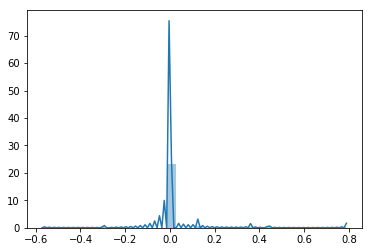

In [0]:
import seaborn as sns
sns.distplot(cmp) # This for ploting distribution 

# ** Step 3: Latent Dirichlet Allocation (LDA) analysis of the data **

In [0]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# LDA analysis of the data
# first clean the data 
stopwords_list = set(stopwords.words('english'))

def pre_process_data(raw_text):
  #lower case all words
  pro_text = [text.lower() for text in raw_text.split()]
  # remove urls
  pro_text = [x for x in pro_text if 'http' not in x]
  
  # remove special characters and numbers
  pro_text = [re.sub(r"[^a-zA-Z]+", ' ', text) for text in pro_text]

  # remove stopwords
  pro_text = [x for x in pro_text if x not in stopwords_list]
  
  # remove short words < 2 characters
  pro_text = [x for x in pro_text if len(x) > 2]
  
  return pro_text

In [0]:
clean_data=[]
for tweet in data.iloc[:,0]:
  clean_tweet = pre_process_data(tweet)
  if clean_tweet != '':
    clean_data.append(clean_tweet)
  

In [0]:
clean_data[1]

['superdry ']

In [0]:
from gensim.corpora import Dictionary, MmCorpus
# create dictionary of the words in the data

dictionary = Dictionary(clean_data)
print("Number of unique words :",len(dictionary))


#create bow of the data
corpus = [dictionary.doc2bow(text) for text in clean_data]



Number of unique words : 191


In [0]:
from gensim.models import LdaModel

# create LDA model 
# first set some parameters 
NUMTOPICS=10 # define how many topics to create from the data, experiment with diffent number here and examine the effect
NUMTERMS= 5 # define how many words to show per topic 

#define the model
ldamodel = LdaModel(corpus, id2word= dictionary, num_topics= NUMTOPICS, passes=50)

In [0]:
# examine generated topic 
for i in range(NUMTOPICS):
    topic = ldamodel.get_topic_terms(i, NUMTERMS)
    print([dictionary[pair[0]] for pair in topic])

[' superdry', 'little', ' satoosm ', 'better', 'makes']
['women s', 'superdry', 'duo ', 'ultimate', 'charliefrederick ']
[' superdonchan', ' mly superdry', ' percent', ' bf oosaka', ' jonghwan']
['lauren', ' missing', 'hulton', 'seen', 'person ']
['truter', 'superdry', ' aska ', ' asuka taznel', ' asahibeer jp']
[' ed superdry', 'area', 'around', ' gmpswintonlh ', 'hulton']
[' mly superdry', ' icchy ', ' max superdry', ' tomi ', ' noriradi']
['superdry ', 'may', 'superdry', 'student', 'getting']
['f r', 'superdry', 'herren', 'versand', 'inkl ']
[' rt', 'superdry', ' takasimaakihide ', 'small', 'ratio']


In [0]:
!pip install pyLDAvis
# Visualise LDA results
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.457599  0.001329       1        1  57.845573
7      0.090732 -0.152855       2        1   7.516902
1      0.063454 -0.170090       3        1   7.451070
2      0.104176  0.276910       4        1   5.756442
4      0.112233  0.005981       5        1   5.216321
0     -0.125331 -0.015864       6        1   4.100113
8      0.068531 -0.130460       7        1   3.753354
9      0.065966 -0.098421       8        1   3.683731
6      0.033739  0.319014       9        1   3.522416
5      0.044099 -0.035543      10        1   1.154076, topic_info=    Category        Freq               Term       Total  loglift  logprob
11   Default  375.000000             little  375.000000  30.0000  30.0000
104  Default  102.000000       mly superdry  102.000000  29.0000  29.0000
145  Default   70.000000                 rt   70.000000  28.0000  28.0000
89   Default   89.000000       superdonchan   89.000000  27.0000  27.0000
26   Default  145.000000           superdry  145.000000  26.0000  26.0000
31   Default   37.000000        ed superdry   37.000000  25.0000  25.0000
4    Default  363.000000               area  363.000000  24.0000  24.0000
5    Default  363.000000             around  363.000000  23.0000  23.0000
2    Default  363.000000      gmpswintonlh   363.000000  22.0000  22.0000
6    Default  363.000000             hulton  363.000000  21.0000  21.0000
8    Default  363.000000               lane  363.000000  20.0000  20.0000
10   Default  363.000000             lauren  363.000000  19.0000  19.0000
9    Default  363.000000               last  363.000000  18.0000  18.0000
14   Default  363.000000              years  363.000000  17.0000  17.0000
12   Default  363.000000            person   363.000000  16.0000  16.0000
13   Default  363.000000               seen  363.000000  15.0000  15.0000
7    Default  363.000000           kearsley  363.000000  14.0000  14.0000
3    Default  363.000000            missing  363.000000  13.0000  13.0000
117  Default   43.000000                f r   43.000000  12.0000  12.0000
29   Default   44.000000            percent   44.000000  11.0000  11.0000
33   Default   52.000000           superdry   52.000000  10.0000  10.0000
1    Default   43.000000          superdry    43.000000   9.0000   9.0000
122  Default   29.000000            versand   29.000000   8.0000   8.0000
119  Default   29.000000              inkl    29.000000   7.0000   7.0000
118  Default   29.000000             herren   29.000000   6.0000   6.0000
88   Default   33.000000          bf oosaka   33.000000   5.0000   5.0000
81   Default   33.000000           jonghwan   33.000000   4.0000   4.0000
163  Default   34.000000       max superdry   34.000000   3.0000   3.0000
112  Default   37.000000                may   37.000000   2.0000   2.0000
66   Default   27.000000             icchy    27.000000   1.0000   1.0000
..       ...         ...                ...         ...      ...      ...
160  Topic10    0.303017          matomame    13.246106   0.6842  -5.7398
159  Topic10    0.303017               aaa    13.246106   0.6842  -5.7398
158  Topic10    0.303017                aaa   13.246106   0.6842  -5.7398
4    Topic10    0.303605               area  363.194000  -2.6251  -5.7379
5    Topic10    0.303600             around  363.193787  -2.6251  -5.7379
2    Topic10    0.303594      gmpswintonlh   363.194061  -2.6251  -5.7379
6    Topic10    0.303577             hulton  363.194061  -2.6252  -5.7380
8    Topic10    0.303574               lane  363.194031  -2.6252  -5.7380
11   Topic10    0.303569             little  375.784882  -2.6593  -5.7380
10   Topic10    0.303566             lauren  363.194031  -2.6252  -5.7380
9    Topic10    0.303563               last  363.193939  -2.6252  -5.7380
14   Topic10    0.303561              years  363.193939  -2.6252  -5.7380
12   Topic10    0.303551            person   363.1940